#### QPE test with random phase gate

In [1]:
import sys
import random

import numpy as np

sys.path.insert(0, "../../src/python")
from gate import phase_gate
from qubit import NQubitState
from qpe import qpe, print_qpe_result

phase = random.random()

u = phase_gate(2 * np.pi * phase)
eigenstate = NQubitState([0.0, 1.0])

precision_qubits = 6
phase_est, probability = qpe(u, eigenstate, precision_qubits)

print_qpe_result(phase, phase_est, probability)

Phase: 0.465
Phase estimate: 0.469 (error: 3.31e-03)
Probability: 0.861


##### QPE circuit

In [2]:
import random
import sys

import numpy as np

sys.path.insert(0, "../../src/python")
from qpe import qpe_circuit, print_qpe_result
from gate import phase_gate
from qubit import NQubitState

phase = random.random()

u = phase_gate(2 * np.pi * phase)
eigenstate = NQubitState([0.0, 1.0])

precision_qubits = 6
phase_est, probability = qpe_circuit(u, eigenstate, precision_qubits)

print_qpe_result(phase, phase_est, probability)

Phase: 0.799
Phase estimate: 0.797 (error: 1.95e-03)
Probability: 0.950


#### QPE test with random unitary gate

In [3]:
import sys

import numpy as np

sys.path.insert(0, "../../src/python")
from qpe import qpe, random_unitary_matrix, print_qpe_result
from gate import Gate
from qubit import NQubitState

num_qubits = 2
precision_qubits = 6
u = Gate(random_unitary_matrix(num_qubits))

eigen_index = 0
eigenvalues, eigenvectors = np.linalg.eig(u)

phase = np.angle(eigenvalues[eigen_index]) / (2.0 * np.pi)
if phase < 0:
  phase += 1.0

eigenstate = NQubitState(eigenvectors[:, eigen_index])
phase_est, probability = qpe(u, eigenstate, precision_qubits)

print_qpe_result(phase, phase_est, probability)


Phase: 0.532
Phase estimate: 0.531 (error: 5.90e-04)
Probability: 0.995


#### QPE test with unitary Hamiltonian

In [4]:
import random
import sys

import numpy as np
import scipy

sys.path.insert(0, "../../src/python")
from qpe import qpe, print_qpe_result
from gate import Gate
from qubit import NQubitState
from vqe_unary import hamiltonian

num_qubits = 2
precision_qubits = 6

lmb = random.random()
H = hamiltonian(lmb)

u = Gate(scipy.linalg.expm(1.0j * H))

eigen_index = 0
eigenvalues, eigenvectors = np.linalg.eig(u)

phase = np.angle(eigenvalues[eigen_index]) / (2.0 * np.pi)
if phase < 0:
  phase += 1.0

eigenstate = NQubitState(eigenvectors[:, eigen_index])
phase_est, probability = qpe(u, eigenstate, precision_qubits)

print(f"Lambda: {lmb:.3f}")
print_qpe_result(phase, phase_est, probability)


Lambda: 0.219
Phase: 0.104
Phase estimate: 0.109 (error: 4.98e-03)
Probability: 0.708


#### QPE probability

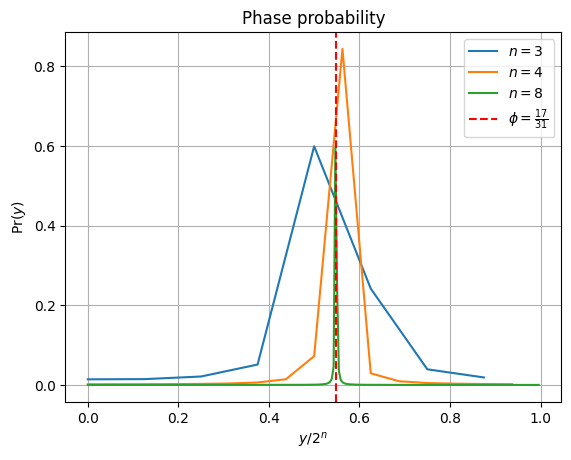

In [6]:
from fractions import Fraction

from matplotlib import pyplot as plt
import numpy as np


def phase_probability(phase: float, precision: int):
  N = 2**precision
  y = np.arange(N)
  y_scaled = y / N

  numerator = 1 - np.exp(1j * 2 * np.pi * (y - N * phase))
  denominator = 1 - np.exp(1j * 2 * np.pi * (y - N * phase) / N)

  probability = np.abs(numerator / denominator) ** 2 / N**2

  return y_scaled, probability


n = (4, 8, 16)
phi = 17 / 31  # unknown phase
phi_frac = Fraction(phi).limit_denominator(100)

for n in (3, 4, 8):
  y, p = phase_probability(phi, n)
  plt.plot(y, p, label=f"$n={n}$")

plt.axvline(
  phi,
  color="red",
  linestyle="--",
  label=rf"$\phi = \frac{{{phi_frac.numerator}}}{{{phi_frac.denominator}}}$",
)
plt.xlabel(r"$y/2^n$")
plt.ylabel(r"$\Pr(y)$")
plt.title("Phase probability")
plt.grid(True)
plt.legend()
plt.savefig("phase_probability.pdf", format="pdf")
plt.show()

#### QPE precision

Success probability: 0.917
Best phase estimate: 0.562 (error: 1.41e-02)


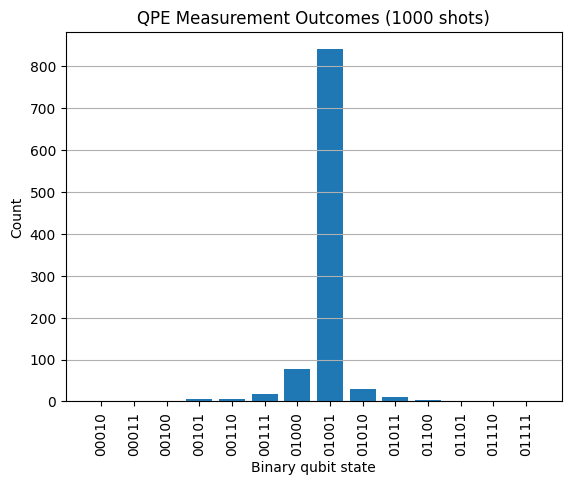

In [ ]:
import sys

from matplotlib import pyplot as plt
import numpy as np

sys.path.insert(0, "../../src/python")
from gate import phase_gate
from qubit import NQubitState
from qpe import qpe_measurements

np.random.seed(42)

phase = 17 / 31

u = phase_gate(2 * np.pi * phase)
eigenstate = NQubitState([0.0, 1.0])

precision_qubits = 4
shots = 1000
counts = qpe_measurements(u, eigenstate, precision_qubits, shots)

success_probability = 0
error = 1 / 2**precision_qubits
for k, v in counts.items():
  phase_est = int(k, 2) / (1 << precision_qubits)
  if np.abs(phase_est - phase) <= error:
    success_probability += v / shots

print(f"Success probability: {success_probability:.3f}")

max_phase = int(max(counts, key=counts.get), 2) / (1 << precision_qubits)
print(f"Best phase estimate: {max_phase:.3f} (error: {np.abs(max_phase - phase):.2e})")

plt.bar(list(counts.keys()), list(counts.values()))
plt.xticks(rotation=90)
plt.xlabel("Binary qubit state")
plt.ylabel("Count")
plt.title(f"QPE Measurement Outcomes ({shots} shots)")
plt.grid(True, axis="y")
# plt.savefig("qpe_measurements.pdf", format="pdf")
plt.show()

In [ ]:
print(1 / 2**8)

0.00390625
